In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [4]:
df = pd.read_csv("evgeni_set.csv")
df['age'] = df['age']/110 #нормализация

In [5]:
#Меня не устраивает что  в train_test_split может в тестовую выборку попасть 0 инфарктов или все 100
#поэтому разделю вручную и соеденю после деления обратно
df_heartattack_x = df[df['minf']==1].iloc[:, 1:]
df_heartattack_y = df[df['minf']==1].iloc[:, 0]
df_no_heartattack_x = df[df['minf']==0].iloc[:, 1:]
df_no_heartattack_y = df[df['minf']==0].iloc[:, 0]

In [6]:
df_heartattack_x_train, df_heartattack_x_test, df_heartattack_y_train, df_heartattack_y_test = train_test_split(df_heartattack_x, df_heartattack_y, test_size=0.2)
df_no_heartattack_x_train, df_no_heartattack_x_test, df_no_heartattack_y_train, df_no_heartattack_y_test = train_test_split(df_no_heartattack_x, df_no_heartattack_y, test_size=0.2)

In [7]:
x_train = pd.concat((df_heartattack_x_train, df_no_heartattack_x_train), axis=0)
y_train = pd.concat((df_heartattack_y_train, df_no_heartattack_y_train), axis=0)
x_test = pd.concat((df_heartattack_x_test, df_no_heartattack_x_test), axis=0)
y_test = pd.concat((df_heartattack_y_test, df_no_heartattack_y_test), axis=0)

#проверка соответствия id после склейки
if all(y_test.index==x_test.index) and all(y_train.index==x_train.index):
    print('Данные склеены правильно')

Данные склеены правильно


In [2]:
from catboost import CatBoostClassifier
from sklearn.metrics import recall_score, f1_score, precision_score
from tqdm import tqdm

iter_max_depth = list(range(6, 14))
iter_n_estimators = list(range(100, 800, 50))

#все возможные комбинации параметров
a = [iter_n_estimators, iter_max_depth]
iters = [list(x) for x in np.array(np.meshgrid(*a)).T.reshape(-1,len(a))]#все возможные комбинации параметров

results = {'iter_n_estimators':[], 'iter_max_depth':[],
            'train_recall_score':[], 'train_f1_score':[], 'train_precision_score':[],
            'test_recall_score':[], 'test_f1_score':[], 'test_precision_score':[]}
for i in tqdm(iters):
        model = CatBoostClassifier(n_estimators=i[0], depth=i[1], learning_rate=1, loss_function='Logloss', verbose=False)
        model.fit(x_train, y_train)
        test_y_pred = model.predict(x_test)
        train_y_pred = model.predict(x_train)
        results['iter_n_estimators'].append(i[0])
        results['iter_max_depth'].append(i[1])
        results['train_recall_score'].append(recall_score(y_train, train_y_pred))
        results['train_f1_score'].append(f1_score(y_train, train_y_pred))
        results['train_precision_score'].append(precision_score(y_train, train_y_pred))
        results['test_recall_score'].append(recall_score(y_test, test_y_pred))
        results['test_f1_score'].append(f1_score(y_test, test_y_pred))
        results['test_precision_score'].append(precision_score(y_test, test_y_pred))

NameError: name 'np' is not defined

In [7]:
df_results=pd.DataFrame(results)
df_results

,iter_n_estimators,iter_max_depth,train_recall_score,train_f1_score,train_precision_score,test_recall_score,test_f1_score,test_precision_score
0,100,6,0.583333,0.715328,0.924528,0.666667,0.736842,0.823529
1,100,7,0.583333,0.715328,0.924528,0.666667,0.736842,0.823529
2,100,8,0.583333,0.715328,0.924528,0.666667,0.736842,0.823529
3,100,9,0.583333,0.715328,0.924528,0.666667,0.736842,0.823529
4,100,10,0.583333,0.715328,0.924528,0.666667,0.736842,0.823529
...,...,...,...,...,...,...,...,...
107,750,9,0.583333,0.715328,0.924528,0.666667,0.736842,0.823529
108,750,10,0.583333,0.715328,0.924528,0.666667,0.736842,0.823529
109,750,11,0.583333,0.715328,0.924528,0.666667,0.736842,0.823529
110,750,12,0.583333,0.715328,0.924528,0.666667,0.736842,0.823529


In [8]:
df_results[df_results['test_recall_score']==df_results['test_recall_score'].max()]

,iter_n_estimators,iter_max_depth,train_recall_score,train_f1_score,train_precision_score,test_recall_score,test_f1_score,test_precision_score
0,100,6,0.583333,0.715328,0.924528,0.666667,0.736842,0.823529
1,100,7,0.583333,0.715328,0.924528,0.666667,0.736842,0.823529
2,100,8,0.583333,0.715328,0.924528,0.666667,0.736842,0.823529
3,100,9,0.583333,0.715328,0.924528,0.666667,0.736842,0.823529
4,100,10,0.583333,0.715328,0.924528,0.666667,0.736842,0.823529
...,...,...,...,...,...,...,...,...
107,750,9,0.583333,0.715328,0.924528,0.666667,0.736842,0.823529
108,750,10,0.583333,0.715328,0.924528,0.666667,0.736842,0.823529
109,750,11,0.583333,0.715328,0.924528,0.666667,0.736842,0.823529
110,750,12,0.583333,0.715328,0.924528,0.666667,0.736842,0.823529


In [9]:
df_results.iloc[0]

iter_n_estimators        100.000000
iter_max_depth             6.000000
train_recall_score         0.583333
train_f1_score             0.715328
train_precision_score      0.924528
test_recall_score          0.666667
test_f1_score              0.736842
test_precision_score       0.823529
Name: 0, dtype: float64

In [34]:
model = CatBoostClassifier(n_estimators=100, depth=6, learning_rate=1, loss_function='Logloss', verbose=False)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[786,   3],
       [  7,  14]], dtype=int64)

Подбор порога

In [46]:
from tqdm import tqdm

prediction = model.predict_proba(x_test)
threshold_results = {'threshold':[], 'test_recall_score':[], 'test_f1_score':[], 'test_precision_score':[]}
iters = prediction[:, 1].copy()
iters.sort()
iters = np.unique(iters)

for i in tqdm(iters[:300]):
    predict_mine = []
    for i2 in prediction:
        if i2[1]>i:
            predict_mine.append(1)
        else:
            predict_mine.append(0)
            
    threshold_results['threshold'].append(i)
    threshold_results['test_recall_score'].append(recall_score(y_test, predict_mine))
    threshold_results['test_f1_score'].append(f1_score(y_test, predict_mine))
    threshold_results['test_precision_score'].append(precision_score(y_test, predict_mine))

 98%|█████████▊| 249/254 [00:01<00:00, 167.27it/s]e:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
100%|██████████| 254/254 [00:01<00:00, 165.06it/s]


In [47]:
df_threshold_results = pd.DataFrame(threshold_results)
df_threshold_results

,threshold,test_recall_score,test_f1_score,test_precision_score
0,0.000008,1.000000,0.050602,0.025958
1,0.000008,1.000000,0.050663,0.025990
2,0.000008,1.000000,0.050971,0.026152
3,0.000008,1.000000,0.051534,0.026448
4,0.000009,1.000000,0.051597,0.026482
...,...,...,...,...
249,0.961559,0.428571,0.600000,1.000000
250,0.963420,0.285714,0.444444,1.000000
251,0.964133,0.238095,0.384615,1.000000
252,0.964341,0.095238,0.173913,1.000000


Text(0, 0.5, 'метрика')

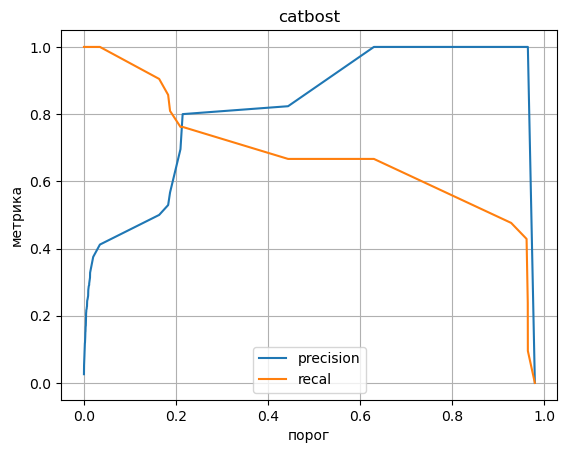

In [51]:
import matplotlib.pyplot as plt
plt.plot(df_threshold_results['threshold'], df_threshold_results['test_precision_score'], label='precision')
plt.plot(df_threshold_results['threshold'], df_threshold_results['test_recall_score'], label='recal')
plt.grid()
plt.legend()
plt.title('catbost')
plt.xlabel('порог')
plt.ylabel('метрика')

In [66]:
df_threshold_results.iloc[245]#вручную искал

threshold               0.214418
test_recall_score       0.761905
test_f1_score           0.780488
test_precision_score    0.800000
Name: 245, dtype: float64